# Explore here

In [1]:
# Your code here
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import requests
import matplotlib.pyplot as plt

resource_url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

response = requests.get(resource_url)

if response.status_code == 200:
    print("¡Petición exitosa! Código:", response.status_code)
    with open("/workspaces/Finarosalina_Regresion_lineal_EDA_insurance/data/raw/medical_insurance_cost.csv", "w", encoding="utf-8") as dataset:
        dataset.write(response.text)
else:
    print("Error al descargar el archivo. Código de estado:", response.status_code)

ds=pd.read_csv("/workspaces/Finarosalina_Regresion_lineal_EDA_insurance/data/raw/medical_insurance_cost.csv")

ds.describe()

¡Petición exitosa! Código: 200


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2]:
# Verificar si hay filas duplicadas: si hay 1 que se elimina
ds=ds.drop_duplicates()
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Variables Categoricas: 'sex', 'smoker', 'region', 'children'  (children lo situo como categórico por simplicidad, ya que toma valores discretos)
Variables numéricas: 'age', 'bmi'
Target: 'charges'

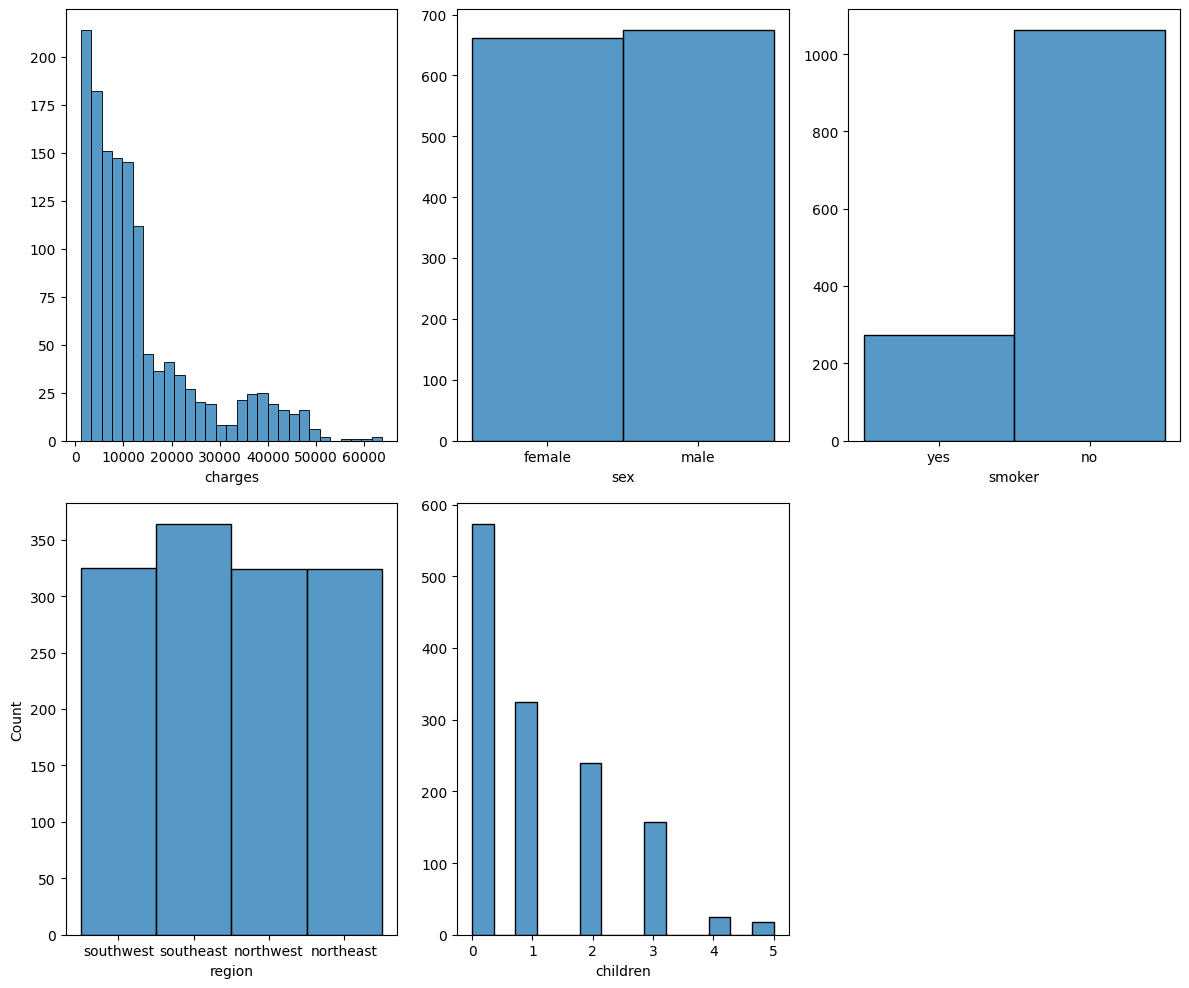

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 3, figsize=(12, 10))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=ds, x="charges").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=ds, x="sex").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=ds, x="smoker").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=ds, x="region")
sns.histplot(ax=axis[1, 1], data=ds, x="children").set(ylabel=None)


# Eliminar el subplot vacío que sobra (axis[3, 2])
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

La mayor parte de los datos de charges están por debajo de 15.000, pero tanbien cuenta con resultados entre 15.000-50.000, por lo que los resultados son muy dispersos.

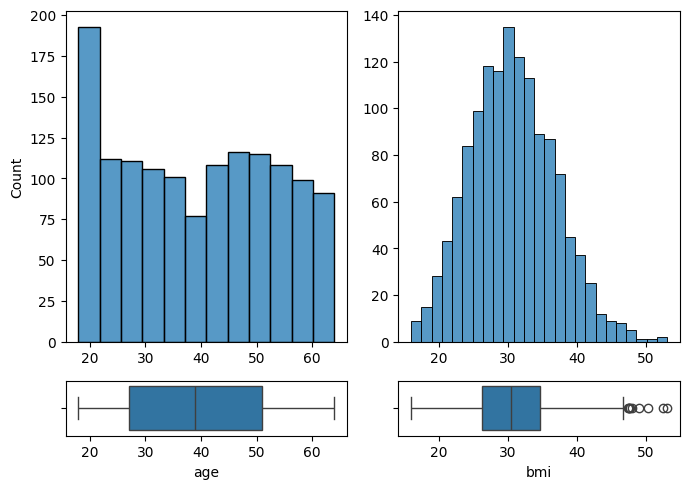

In [4]:
fig, axis = plt.subplots(2, 2, figsize = (7, 5), gridspec_kw={'height_ratios': [6, 1]})

# Variables numéricas: 'age', 'bmi'

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = ds, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = ds, x = "age")
sns.histplot(ax = axis[0, 1], data = ds, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = ds, x = "bmi")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


En BMI, se aprecian valores atípicos por encima de 46, son 16 valores, pero tras representar histograma y ver los valores >47 y su dispersion en el valor de charges, decido eliminarlos.
En cuanto a la edad, la mayor parte de los datos están entre 27-50 años, con media aprox de 39, pero existe un pico de datos en torno a los 20 años, con un 25% de valores por debajo de 27.Pero no pueden considerarse outliers.

In [5]:
outlier_bmi= ds[ds['bmi']>46]
outlier_bmi

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
660,37,male,46.53,3,no,southeast,6435.62370
847,23,male,50.38,1,no,southeast,2438.05520


<Axes: xlabel='bmi', ylabel='Count'>

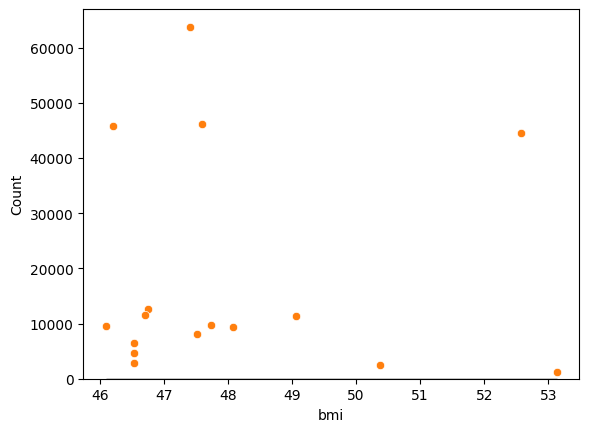

In [6]:
sns.histplot(data=outlier_bmi, x="bmi")
sns.scatterplot(data=outlier_bmi, x="bmi", y="charges")

In [7]:
ds=ds[ds['bmi']<47]

Análisis de variables multivariante.

Análisis numérico-numérico

La distribucion de la edad es mas o menos uniforme y no se aprecian valores atípicos.
El BMI si tiene outliers, que seguramente haya que eliminar.

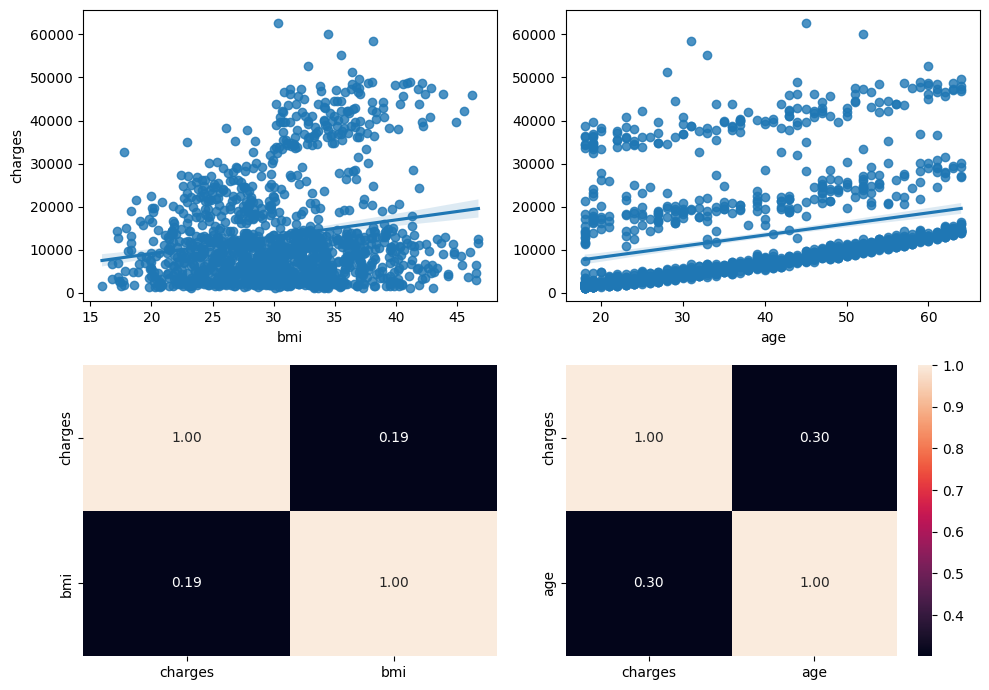

In [8]:
# bmi y bmi con charges
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds, x = "bmi", y = "charges")
sns.heatmap(ds[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = ds, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(ds[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Se observa correlación entre la edad y el precio del seguro, y de forma más leve entre bmi y charges.

Analisis categórico - categórico

'sex', 'smoker', 'region', 'children' 

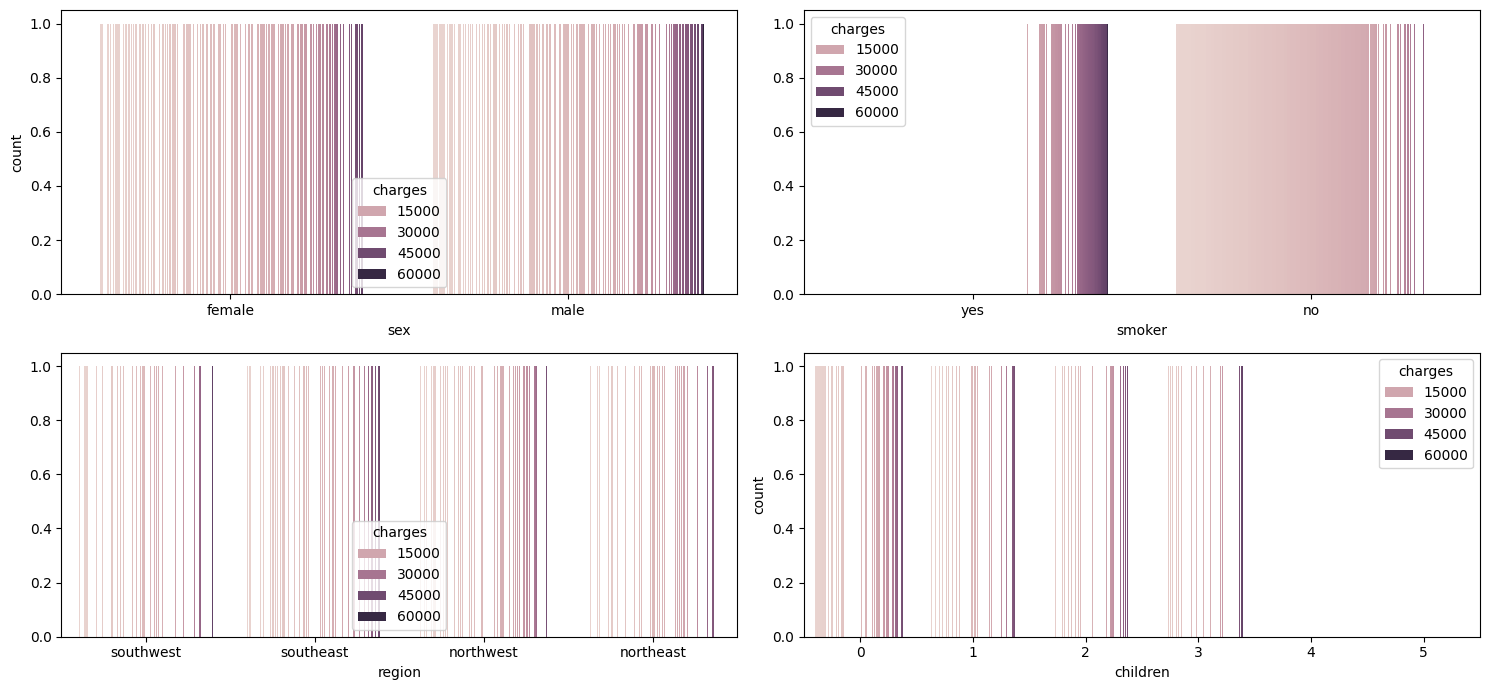

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = ds, x = "sex", hue = "charges")
sns.countplot(ax = axis[0, 1], data = ds, x = "smoker", hue = "charges").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = ds, x = "region", hue = "charges").set(ylabel = None)
sns.countplot(ax = axis[1, 1], data = ds, x = "children", hue = "charges")

plt.tight_layout()
plt.show()

No se aprecian tendencias claras, por lo que mejor tratar de verlo en diagramas de dispersion y combinando clases.

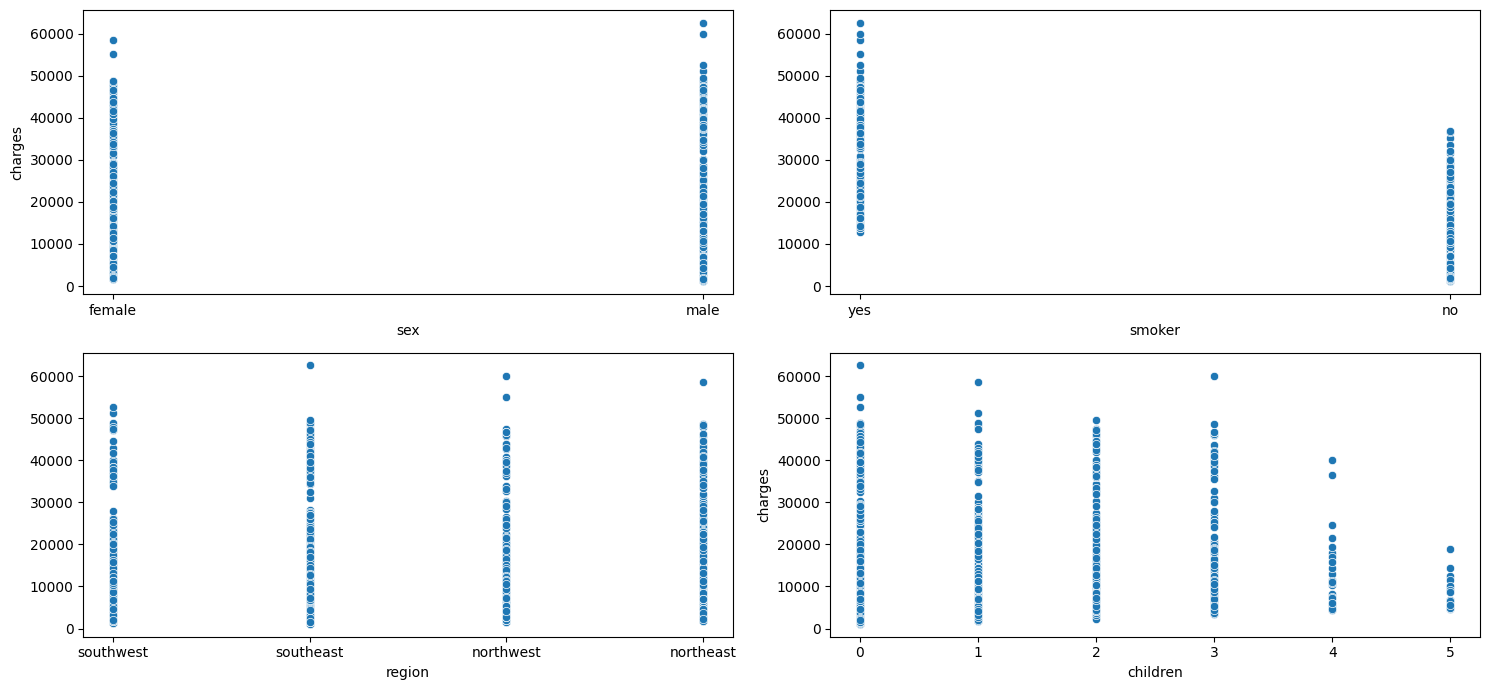

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.scatterplot(ax = axis[0, 0], data = ds, x = "sex", y= "charges")
sns.scatterplot(ax = axis[0, 1], data = ds, x = "smoker", y= "charges").set(ylabel = None)
sns.scatterplot(ax = axis[1, 0], data = ds, x = "region", y= "charges").set(ylabel = None)
sns.scatterplot(ax = axis[1, 1], data = ds, x = "children", y= "charges")

plt.tight_layout()
plt.show()

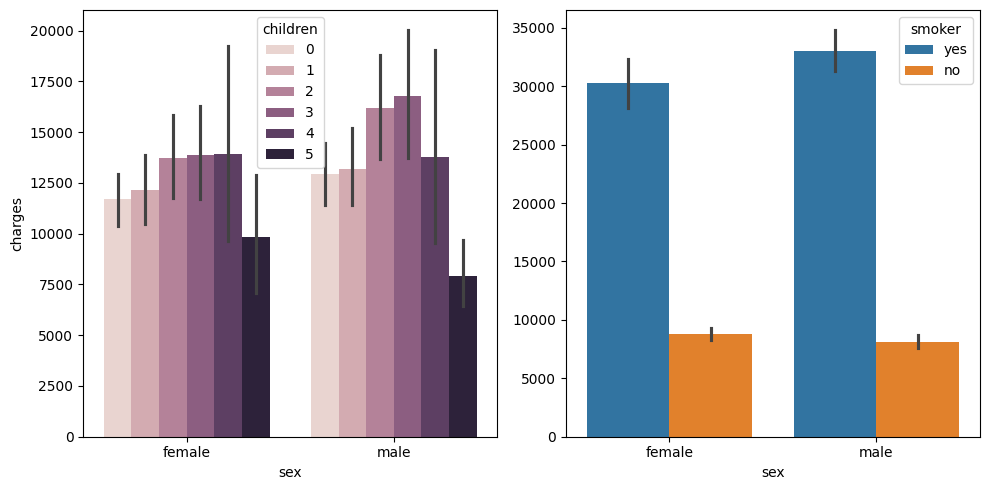

In [11]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = ds, x = "sex", y = "charges", hue = "children")
sns.barplot(ax = axis[1], data = ds, x = "sex", y = "charges", hue = "smoker").set(ylabel = None)

plt.tight_layout()

plt.show()

Se aprecia que tanto en hombres como en mujeres, fumar hace que el seguro sea mucho más caro. No influey se hombre o mujer.

Análisis de correlaciones

Categóricos-cagegóricos:

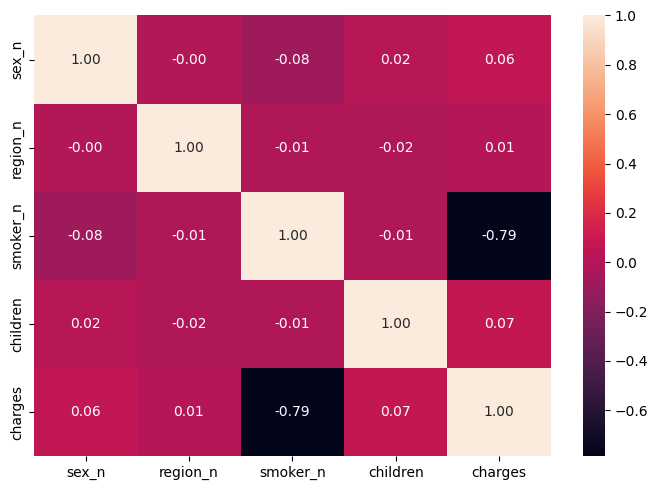

In [12]:
ds["sex_n"] = pd.factorize(ds["sex"])[0]
ds["smoker_n"] = pd.factorize(ds["smoker"])[0]
ds["region_n"] = pd.factorize(ds["region"])[0]

fig, axis = plt.subplots(figsize = (7, 5))

sns.heatmap(ds[["sex_n", "region_n", "smoker_n", "children", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Se aprecia una fuerte relación entre ser fumador y la variable objetivo. Con el resto de varibles categóricas la corelación es despreciable

Análisis numérico-categórico (completo)

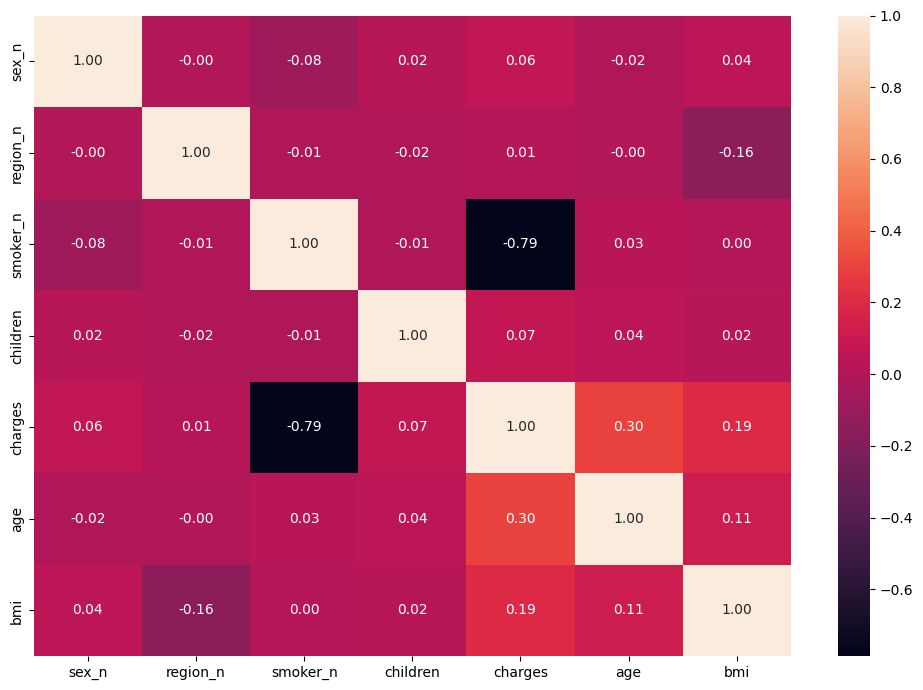

In [13]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(ds[["sex_n", "region_n", "smoker_n", "children", "charges", "age", "bmi" ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

<Axes: xlabel='sex', ylabel='charges'>

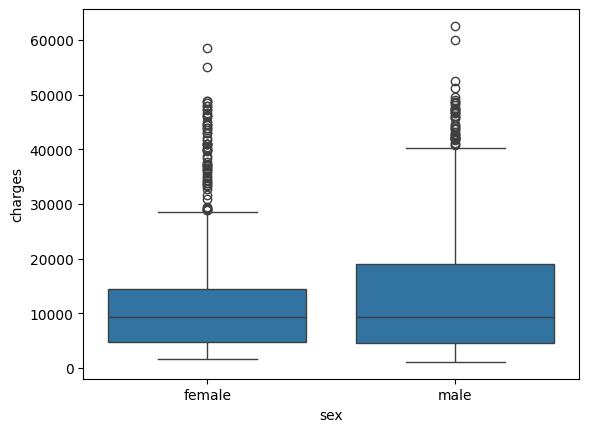

In [14]:
sns.boxplot(data=ds, x="sex", y="charges")


En una regresión lineal no se aprecia apenas correlación entre sex y charges, pero si puede influir de forma muy leve

<Axes: xlabel='children', ylabel='charges'>

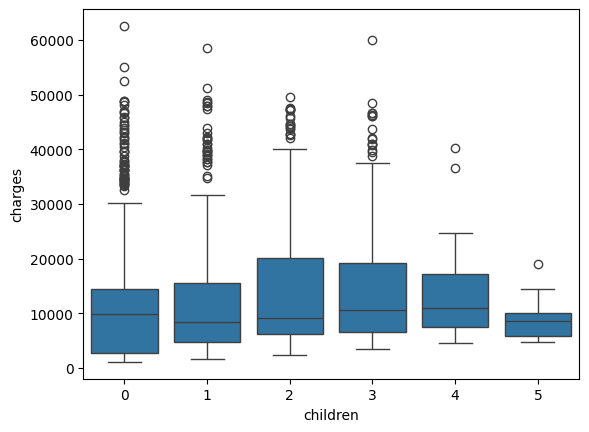

In [15]:
sns.boxplot(data=ds, x="children", y="charges")

atributos con mayores correlaciones : edad, fumador, y más leve bmi

In [16]:
# Análisis de outliers

ds.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.537308,1.097139,13221.047810,0.503765,0.795934,1.486446
std,14.042170,5.922176,1.208008,11997.547468,0.500174,0.403169,1.106859
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.220000,0.000000,4744.325050,0.000000,1.000000,1.000000
50%,39.000000,30.300000,1.000000,9369.615750,1.000000,1.000000,1.000000
75%,51.000000,34.488750,2.000000,16604.302645,1.000000,1.000000,2.000000
max,64.000000,46.750000,5.000000,62592.873090,1.000000,1.000000,3.000000


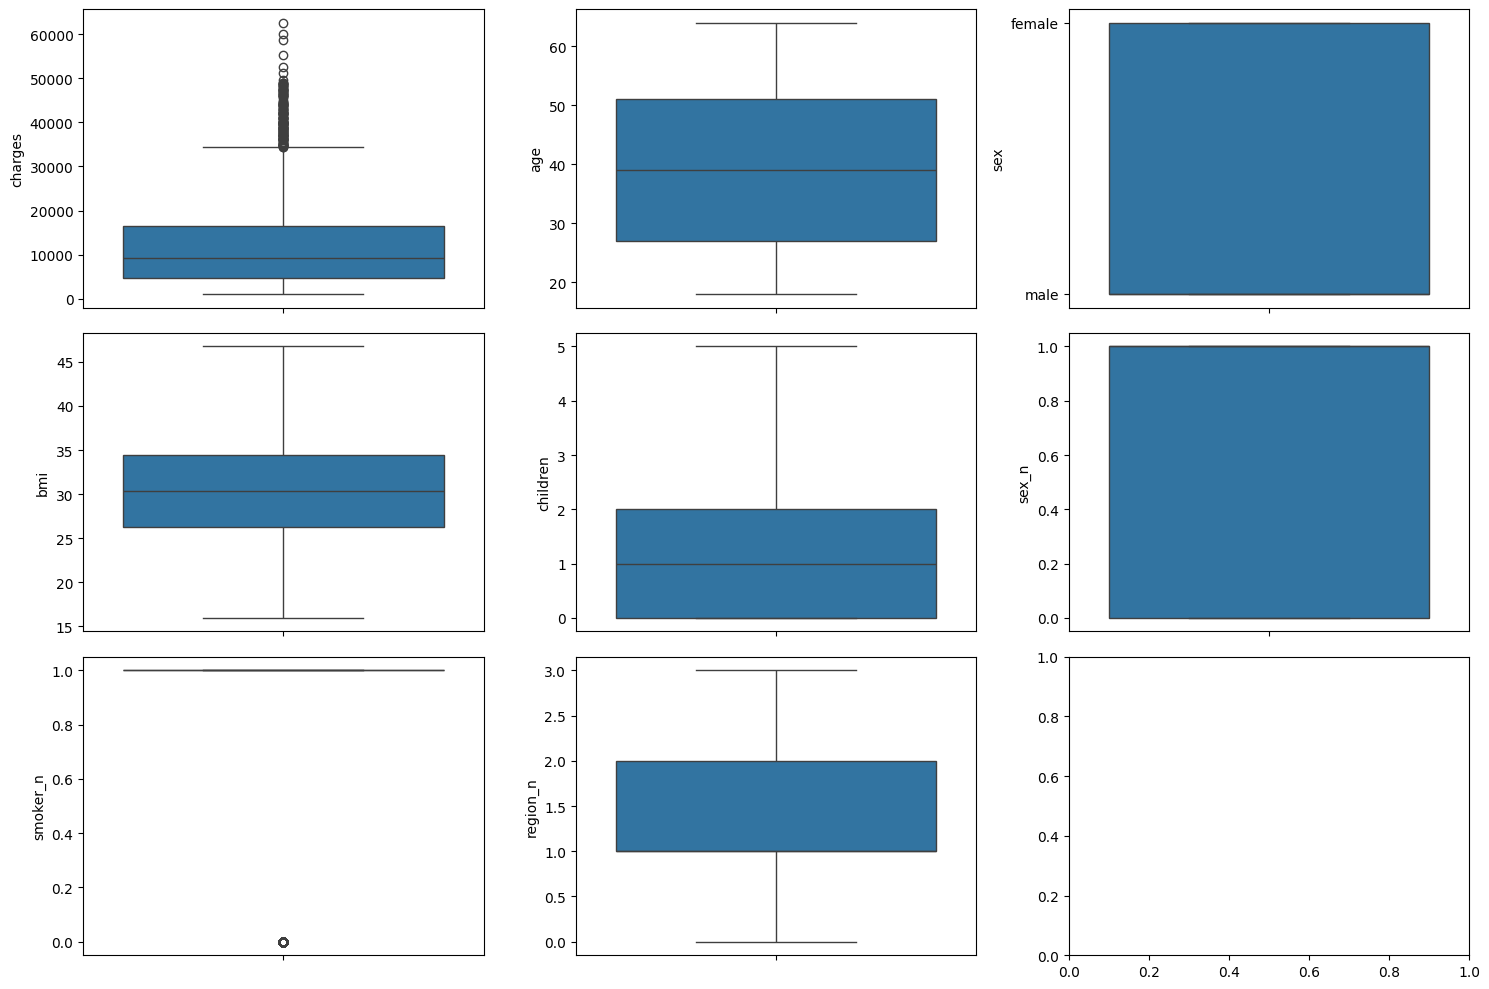

In [17]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = ds, y = "charges")
sns.boxplot(ax = axis[0, 1], data = ds, y = "age")
sns.boxplot(ax = axis[0, 2], data = ds, y = "sex")
sns.boxplot(ax = axis[1, 0], data = ds, y = "bmi")
sns.boxplot(ax = axis[1, 1], data = ds, y = "children")
sns.boxplot(ax = axis[1, 2], data = ds, y = "sex_n")
sns.boxplot(ax = axis[2, 0], data = ds, y = "smoker_n")
sns.boxplot(ax = axis[2, 1], data = ds, y = "region_n")

plt.tight_layout()

plt.show()


Si bien charges es una variable objetivo, se observan valores atipicos, por encima de 50.000 que pueden tener explcación con otros factores que aquí no están incuidos.No se trata de gente especialmente mayor, con bmi alto o con muchos hijos, no responde a estos patrones.  Al ordenarlos, se aprecia que en 5 registros hay una caida de 10.000€ que no se matiene en el resto. Creo que esto puede distornionar el resultado del algoritmo, porque daría unos precios más altos de lo esperable, si no se tienen en cuenta esos valores. 
Sólo se apreció relación en los fumadores, la edad y de forma muy leve el bmi, por lo que eliminaría el resto de columnas.

In [18]:
ds.sort_values("charges", ascending=False).head(20)

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
1300,45,male,30.360,0,yes,southeast,62592.87309,1,0,1
1230,52,male,34.485,3,yes,northwest,60021.39897,1,0,2
577,31,female,38.095,1,yes,northeast,58571.07448,0,0,3
819,33,female,35.530,0,yes,northwest,55135.40209,0,0,2
1146,60,male,32.800,0,yes,southwest,52590.82939,1,0,0
34,28,male,36.400,1,yes,southwest,51194.55914,1,0,0
1241,64,male,36.960,2,yes,southeast,49577.66240,1,0,1
1062,59,male,41.140,1,yes,southeast,48970.24760,1,0,1
488,44,female,38.060,0,yes,southeast,48885.13561,0,0,1
175,63,female,37.700,0,yes,southwest,48824.45000,0,0,0


In [19]:
filtro_ds= ds[ds['smoker'] == 'yes']
filtro_ds.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.0,271.000000
mean,38.523985,30.503782,1.114391,31835.343855,0.583026,0.0,1.498155
std,13.932057,6.038645,1.160226,11384.541798,0.493971,0.0,1.081407
min,18.000000,17.195000,0.000000,12829.455100,0.000000,0.0,0.000000
25%,27.000000,26.050000,0.000000,20759.808425,0.000000,0.0,1.000000
50%,38.000000,30.360000,1.000000,34303.167200,1.000000,0.0,1.000000
75%,49.000000,35.025000,2.000000,40936.857450,1.000000,0.0,2.000000
max,64.000000,46.200000,5.000000,62592.873090,1.000000,0.0,3.000000


In [20]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = ds['charges'].quantile(0.25)
Q3 = ds['charges'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 34394.27 y -13045.64, con un rango intercuartílico de 11859.98


In [21]:
ds[ds['charges']>34394.27].value_counts()  # Length: 138. Sería eliminar demasiados valores del grupo de fumadores.

age  sex     bmi     children  smoker  region     charges      sex_n  smoker_n  region_n
18   female  36.850  0         yes     southeast  36149.48350  0      0         1           1
             42.240  0         yes     southeast  38792.68560  0      0         1           1
     male    33.535  0         yes     northeast  34617.84065  1      0         3           1
             38.170  0         yes     southeast  36307.79830  1      0         1           1
19   female  32.490  0         yes     northwest  36898.73308  0      0         2           1
                                                                                           ..
63   male    35.090  0         yes     southeast  47055.53210  1      0         1           1
64   female  31.300  2         yes     southwest  47291.05500  0      0         0           1
             33.800  1         yes     southwest  47928.03000  0      0         0           1
     male    33.880  0         yes     southeast  46889.26120  1 

In [22]:
# Definir los límites inferior y superior
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 52184.24 y -30835.61, con un rango intercuartílico de 11859.98


In [34]:
# Filtrar primero los valores bajos de charges y crear un nuevo DataFrame
ds_minimo = ds[ds['charges'] < 52184.24].copy()
ds_minimo.drop(['region', 'region_n', 'children', 'smoker', 'sex', 'sex_n'], axis=1, inplace=True)
ds_minimo.head()

output_path = '/workspaces/Finarosalina_Regresion_lineal_EDA_insurance/data/processed/ds_minimo.csv'
ds_minimo.to_csv(output_path, index=False)


In [24]:
from sklearn.model_selection import train_test_split


# Dividimos el conjunto de datos en muestras de train y test
X = ds_minimo.drop("charges", axis = 1)
y = ds_minimo["charges"]

# split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train.head()

,age,bmi,smoker_n
1184,23,28.49,0
311,19,24.70,1
210,20,33.00,1
365,49,30.78,1
141,26,32.49,1


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# Variables numéricas a escalar 
variables_para_escalar = ['age', 'bmi']

# Inicializamos el escalador
scaler = MinMaxScaler()

# Escalar solo las variables que se deben escalar
X_train_escalado = X_train.copy()
X_train_escalado[variables_para_escalar] = scaler.fit_transform(X_train[variables_para_escalar])

# Escalar los datos de prueba (usando el mismo escalador)
X_test_escalado = X_test.copy()
X_test_escalado[variables_para_escalar] = scaler.transform(X_test[variables_para_escalar])

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos escalados (age y bmi), 
modelo.fit(X_train_escalado, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test_escalado)

# Mostrar las primeras predicciones para verificar
print(y_pred[:5])



[ 9637.56120813  3073.82647106  4087.54508635  7917.55325111
 32012.39177805]


In [ ]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos escalados
model.fit(X_train_escalado, y_train)


LinearRegression()

In [27]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 21214.8390352685
Coeficientes (b): [ 12045.14303565   9736.67481526 -23007.76882945]


In [28]:
y_pred = model.predict(X_test_escalado)

In [29]:
X_test_escalado.head()

,age,bmi,smoker_n
733,0.652174,0.367165,1
482,0.000000,0.499838,1
241,0.326087,0.200552,1
425,0.586957,0.271192,1
49,0.391304,0.624878,0


In [30]:
# Predecir con el modelo ya entrenado
y_pred = model.predict(X_test_escalado)

# Asegurarte de que sea una Serie 1D con el mismo índice
y_pred = pd.Series(y_pred, index=y_test.index)


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 33061697.039030083
Coeficiente de determinación: 0.7572175599458013


No es un buen resultado, pero al añadir atributos como sex o children empeora. El hecho de que smoker, de reaultados negativos no tiene sentido, está claro que hay que mejorar el analisis, no sé si haciendo otro escalado.

In [37]:
import json

# Abrir el archivo Jupyter Notebook (.ipynb)
with open('/workspaces/Finarosalina_Regresion_lineal_EDA_insurance/src/explore.ipynb', 'r') as notebook_file:
    notebook_content = json.load(notebook_file)

# Extraer solo el código de las celdas de tipo "code"
code_cells = []
for cell in notebook_content['cells']:
    if cell['cell_type'] == 'code':  # Filtramos solo las celdas de código
        code_cells.append(''.join(cell['source']))  # Unimos el contenido de cada celda de código

# Unir todo el código extraído en un solo bloque
code_text = '\n\n'.join(code_cells)

# Guardar el código en un archivo .py
with open('/workspaces/Finarosalina_Regresion_lineal_EDA_insurance/src/app.py', 'w') as app_file:
    app_file.write(code_text)

